In [2]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates
from main import *


In [3]:
pi_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_1993-2000_pwl_harmwl_bwl.csv')
pi_9300_LH.drop(labels=range(701280,701286),axis = 0, inplace = True)
pi_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_2001-2012_pwl_harmwl_bwl.csv')
pi_0112_LH.drop(labels=range(1051920,1051926), axis = 0, inplace=True)
pi_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_2013-2023_pwl_harmwl_bwl.csv')
pi_1323_LH.drop(labels=range(len(pi_1323_LH)-6,len(pi_1323_LH)), axis=0, inplace=True)
directory_path = '/Users/rprocious/Downloads/data/NOAA/portIsabel/'

dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

pi_NOAA = pd.concat(dataframes, ignore_index=True)
pi_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
pi_NOAA.reset_index(drop = True, inplace=True)
frames = [pi_9300_LH,pi_0112_LH,pi_1323_LH]
pi_LH = pd.concat(frames, ignore_index=True)
pi_LH.drop(labels=range(0,262800),axis=0, inplace=True)
pi_LH.reset_index(drop=True, inplace=True)

comparison_df = pd.DataFrame()
comparison_df['Dates'] = pi_LH['#date+time']
comparison_df['Lighthouse WL'] = pi_LH['018-pwl']
comparison_df['NOAA WL'] = pi_NOAA[' Water Level']

comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df.tail()


C:\Users\rprocious\AppData\Local\Temp\ipykernel_1912\55218230.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pi_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_1993-2000_pwl_harmwl_bwl.csv')
C:\Users\rprocious\AppData\Local\Temp\ipykernel_1912\55218230.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pi_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_2001-2012_pwl_harmwl_bwl.csv')
C:\Users\rprocious\AppData\Local\Temp\ipykernel_1912\55218230.py:5: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  pi_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_2013-2023_pwl_harmwl_bwl.csv')
C:\Users\rprocious\AppData\Local\Temp\ipykernel_1912\55218230.py:36: FutureWarning: A value is trying to be set on a

,Dates,Lighthouse WL,NOAA WL
2454475,2023-12-31 23:30:00,1.440,1.445
2454476,2023-12-31 23:36:00,1.445,1.451
2454477,2023-12-31 23:42:00,1.451,1.458
2454478,2023-12-31 23:48:00,1.458,1.464
2454479,2023-12-31 23:54:00,1.464,1.470


In [4]:
#function to find the index of a date range
def date_index_locater(start_date,end_date):
    indices = []
# Filter rows by date range
    date_range_filter = (comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)

# Get the indices of the rows within the date range
    indices = (comparison_df[date_range_filter].index.tolist())

    return(indices)


Text(0.5, 1.0, 'Port Isabel')

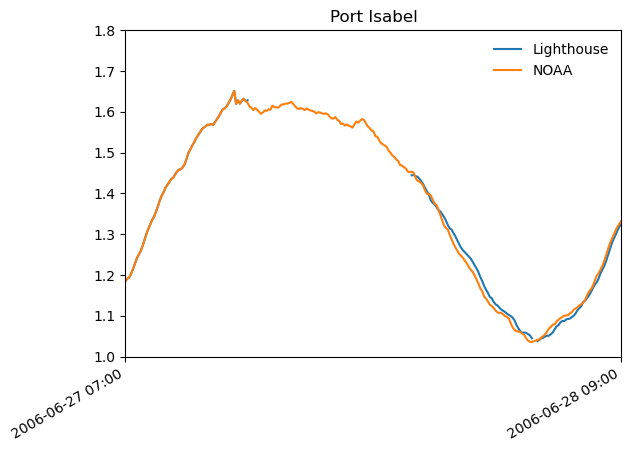

In [5]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1,1.8)

start_date = pd.to_datetime('2006-06-27 07:00')

end_date = pd.to_datetime('2006-06-28 09:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel')

In [6]:
date_index_locater('2006-06-28 00:00','2006-06-28 00:06')

[919440, 919441]

Time offset begins here

In [7]:
comparison_df[919410:919434]

,Dates,Lighthouse WL,NOAA WL
919410,2006-06-27 21:00:00,NaN,1.492
919411,2006-06-27 21:06:00,NaN,1.489
919412,2006-06-27 21:12:00,NaN,1.483
919413,2006-06-27 21:18:00,NaN,1.479
919414,2006-06-27 21:24:00,NaN,1.469
919415,2006-06-27 21:30:00,NaN,1.468
919416,2006-06-27 21:36:00,NaN,1.464
919417,2006-06-27 21:42:00,NaN,1.461
919418,2006-06-27 21:48:00,NaN,1.453
919419,2006-06-27 21:54:00,NaN,1.452


In [8]:
#drops a nan value before time shift
revised_LH = pd.DataFrame()
revised_LH['Adjusted LH WL'] = comparison_df['Lighthouse WL']
revised_LH.drop(919419,axis = 0, inplace=True)
revised_LH.reset_index(drop = True, inplace=True)
comparison_df['Shifted LH WL'] = revised_LH['Adjusted LH WL']
comparison_df[919520:919530].to_clipboard()

Text(0.5, 1.0, 'Port Isabel Correction')

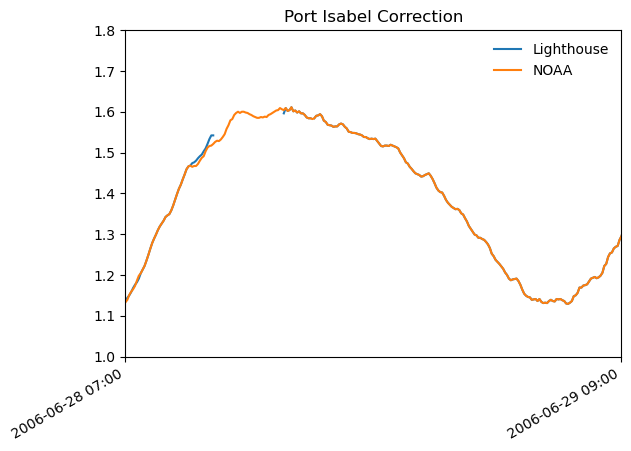

In [9]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1,1.8)

start_date = pd.to_datetime('2006-06-28 07:00')

end_date = pd.to_datetime('2006-06-29 09:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabel Correction')

In [10]:
mask = comparison_df['Shifted LH WL'] == comparison_df['Shifted LH WL'].shift(-1)

# Use the mask to filter the DataFrame and get the double values and date
double_values = comparison_df.loc[mask, 'Shifted LH WL']
double_dates = comparison_df.loc[mask, 'Dates']

double_dates

12        1996-01-01 01:12:00
29        1996-01-01 02:54:00
39        1996-01-01 03:54:00
40        1996-01-01 04:00:00
43        1996-01-01 04:18:00
                  ...        
2454310   2023-12-31 07:00:00
2454311   2023-12-31 07:06:00
2454333   2023-12-31 09:18:00
2454453   2023-12-31 21:18:00
2454455   2023-12-31 21:30:00
Name: Dates, Length: 136806, dtype: datetime64[ns]

In [11]:
differences = comparison_df['Shifted LH WL'] - comparison_df['NOAA WL']
non_zero_differences = differences != 0

filtered_differences = differences[non_zero_differences]
filtered_dates = comparison_df['Dates'][non_zero_differences]

# Convert the results to DataFrames
differences_df = filtered_differences.to_frame(name='Difference')
dates_df = filtered_dates.to_frame(name='Date')

# Combine the two DataFrames
remaining_differences = differences_df.join(dates_df, how='inner')

cleaned_remaining_differences = remaining_differences.dropna()
cleaned_remaining_differences.reset_index(drop = True, inplace=True)
mask = abs(cleaned_remaining_differences['Difference']) >= 0.005

cleaned_remaining_differences = cleaned_remaining_differences[mask]


for i in range(1, 11):
    cleaned_remaining_differences[f'Next_{i}'] = cleaned_remaining_differences['Difference'].shift(-i)

# Check if the current value is equal to the next 10 values
cleaned_remaining_differences['All_Next_10_Equal'] = cleaned_remaining_differences.apply(lambda row: all(row['Difference'] == row[f'Next_{i}'] for i in range(1, 11)), axis=1)

# Drop the helper columns if they are no longer needed
cleaned_remaining_differences.drop(columns=[f'Next_{i}' for i in range(1, 11)], inplace=True)


mask = cleaned_remaining_differences['All_Next_10_Equal'] == True

# Filter the DataFrame using the mask
cleaned_remaining_differences = cleaned_remaining_differences[mask]

# Reset index if needed
cleaned_remaining_differences.reset_index(drop=True, inplace=True)

cleaned_remaining_differences.to_clipboard()

0.121 Ofset from 2011-10-19 18:36 till 2011-10-20 11:54

0.005 offset from 2016-10-12 19:18 till 2016-10-13 10:36

-0.012 offset from 2016-10-13 13:30 till 2016-10-18 14:42

-0.006 offset from 2018-11-05 15:24 till 2019-03-07 13:24

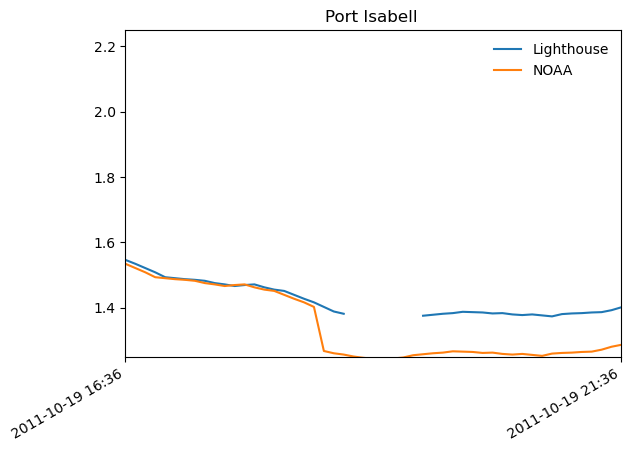

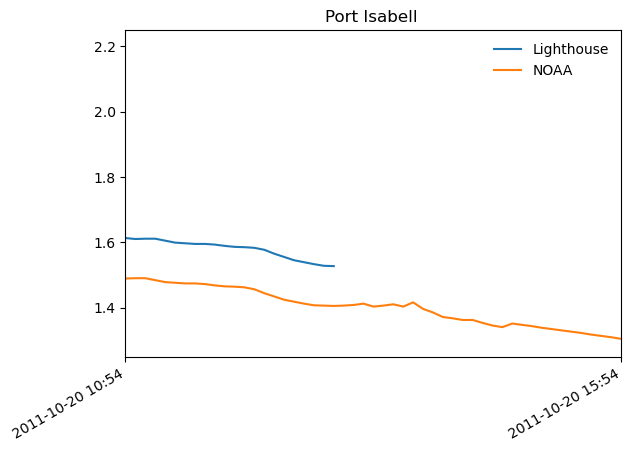

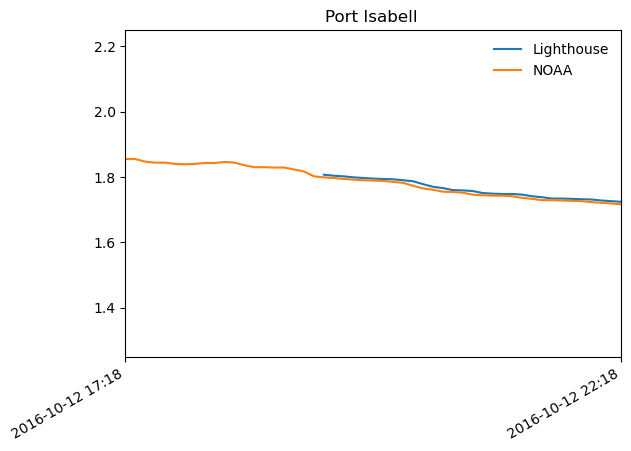

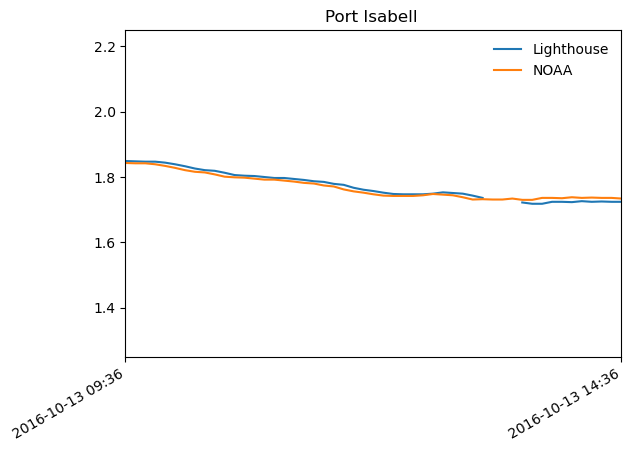

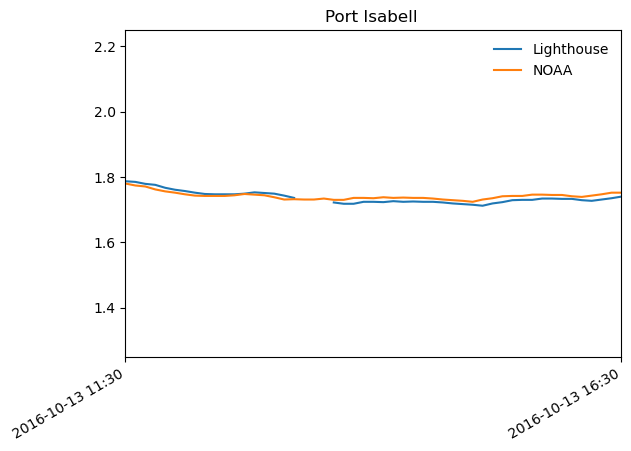

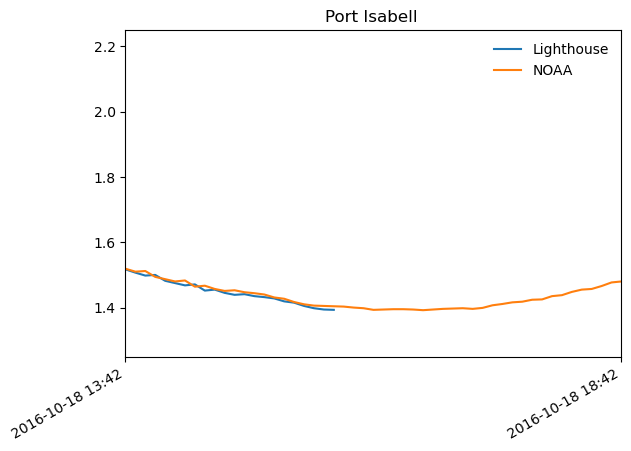

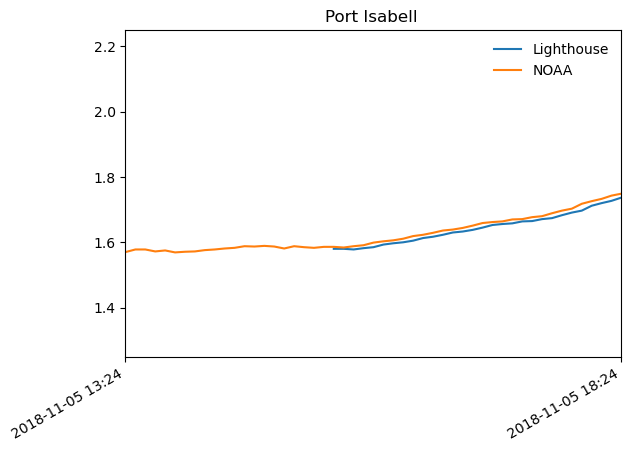

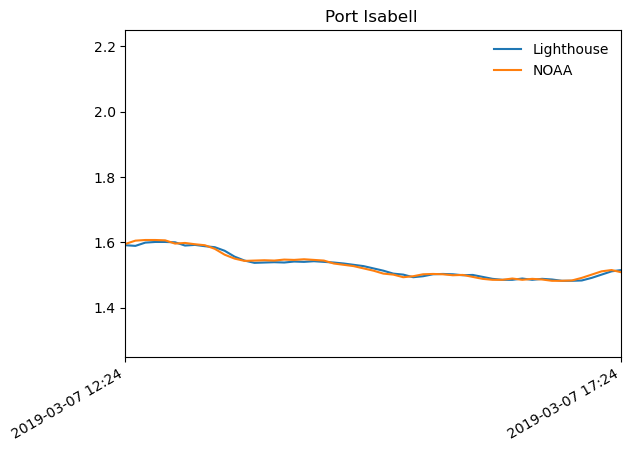

In [12]:
start_dates = ('2011-10-19 17:36','2011-10-20 11:54','2016-10-12 18:18','2016-10-13 10:36','2016-10-13 12:30','2016-10-18 14:42','2018-11-05 14:24','2019-03-07 13:24')

for i in range(len(start_dates)):
    plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

    plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

    plt.gcf().autofmt_xdate()

    plt.ylim(1.25,2.25)

    start_date = pd.to_datetime(start_dates[i]) - pd.DateOffset(hours= 1)

    end_date = pd.to_datetime(start_dates[i]) + pd.DateOffset(hours = 4)

    plt.xlim(start_date, end_date)
    plt.legend(frameon = False)
    plt.title('Port Isabell ')
    plt.show()

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '0.005m Offset')

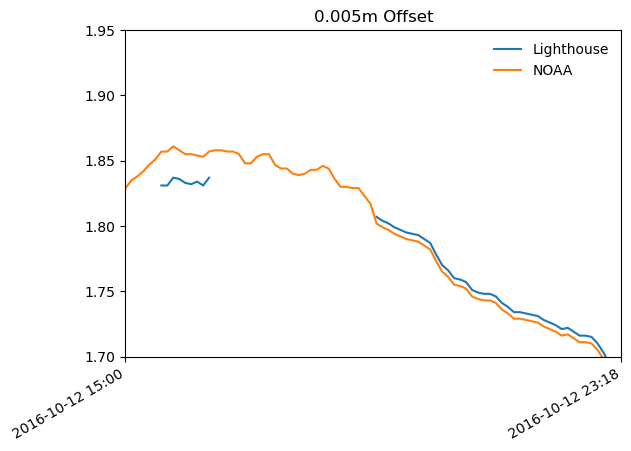

In [13]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.7,1.95)

start_date = pd.to_datetime('2016-10-12 15:00')

end_date = pd.to_datetime('2016-10-12 23:18')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('0.005m Offset')

Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, '-0.006m Offset')

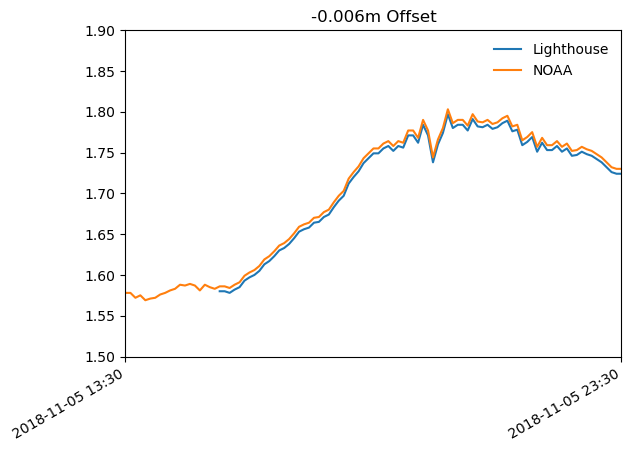

In [14]:
plt.plot(comparison_df['Dates'],comparison_df['Shifted LH WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(1.5,1.9)

start_date = pd.to_datetime('2018-11-05 13:30')

end_date = pd.to_datetime('2018-11-05 23:30')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('-0.006m Offset')

In [15]:
end_dates = ['2011-10-19 18:30','2016-10-12 19:12','2016-10-13 13:24','2018-11-05 15:18']

nan_counts = {}

for end_date in end_dates:
    end_index = comparison_df[comparison_df['Dates'] == end_date].index[0]
    start_index = comparison_df.loc[:end_index, 'Shifted LH WL'].last_valid_index()
    
    # Count the NaNs in the gap
    nan_count = comparison_df.loc[start_index:end_index, 'Shifted LH WL'].isna().sum()
    
    # Store the count in the dictionary
    nan_counts[end_date] = nan_count
nan_counts

{'2011-10-19 18:30': 0,
 '2016-10-12 19:12': 0,
 '2016-10-13 13:24': 3,
 '2018-11-05 15:18': 2631}

In [19]:
comparison_df['Differences'] = comparison_df['Shifted LH WL'] - comparison_df['NOAA WL']

In [22]:
date_locations = date_index_locater('2016-10-13 12:30',' 2016-10-13 14:30')
comparison_df[date_locations[0]:date_locations[-1]]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL,Differences
1821965,2016-10-13 12:30:00,1.747,1.742,1.747,0.005
1821966,2016-10-13 12:36:00,1.747,1.744,1.749,0.005
1821967,2016-10-13 12:42:00,1.749,1.748,1.753,0.005
1821968,2016-10-13 12:48:00,1.753,1.746,1.751,0.005
1821969,2016-10-13 12:54:00,1.751,1.744,1.749,0.005
1821970,2016-10-13 13:00:00,1.749,1.738,1.743,0.005
1821971,2016-10-13 13:06:00,1.743,1.731,1.736,0.005
1821972,2016-10-13 13:12:00,1.736,1.732,NaN,NaN
1821973,2016-10-13 13:18:00,NaN,1.731,NaN,NaN
1821974,2016-10-13 13:24:00,NaN,1.731,NaN,NaN


In [23]:
date_locations = date_index_locater('2018-11-05 13:24','2018-11-05 17:24')
comparison_df[date_locations[0]:date_locations[-1]]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL,Differences
2002694,2018-11-05 13:24:00,NaN,1.570,NaN,NaN
2002695,2018-11-05 13:30:00,NaN,1.578,NaN,NaN
2002696,2018-11-05 13:36:00,NaN,1.578,NaN,NaN
2002697,2018-11-05 13:42:00,NaN,1.572,NaN,NaN
2002698,2018-11-05 13:48:00,NaN,1.575,NaN,NaN
2002699,2018-11-05 13:54:00,NaN,1.569,NaN,NaN
2002700,2018-11-05 14:00:00,NaN,1.571,NaN,NaN
2002701,2018-11-05 14:06:00,NaN,1.572,NaN,NaN
2002702,2018-11-05 14:12:00,NaN,1.576,NaN,NaN
2002703,2018-11-05 14:18:00,NaN,1.578,NaN,NaN
